In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

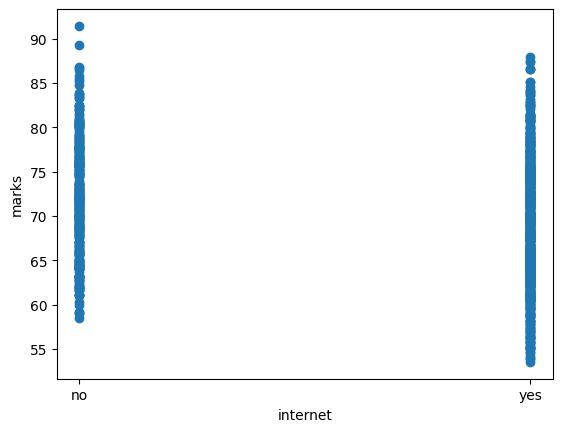

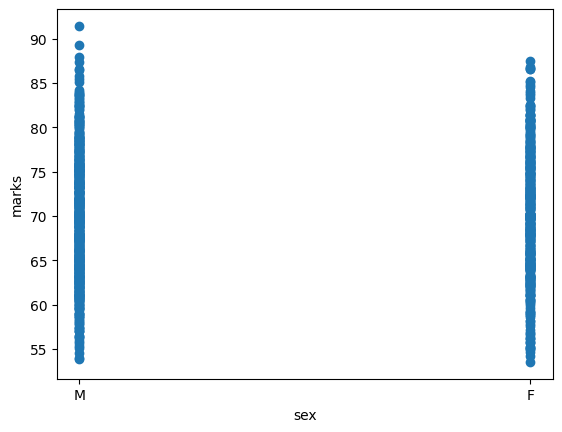

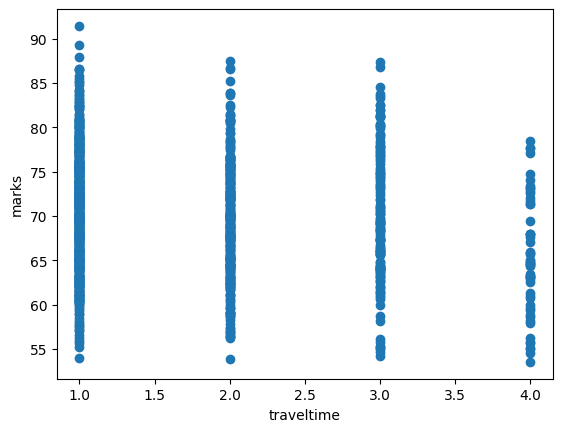

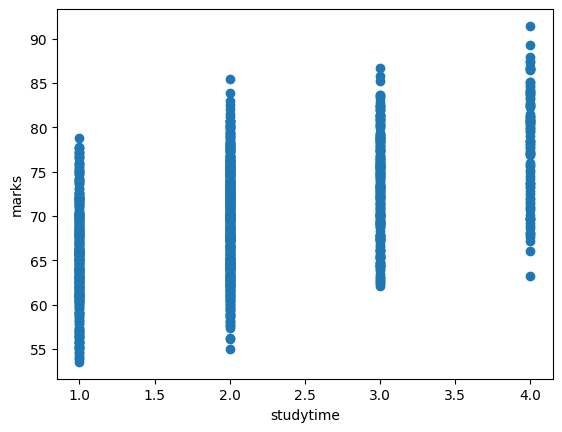

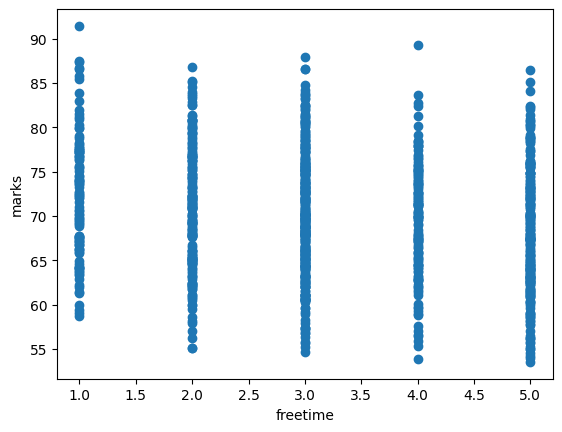

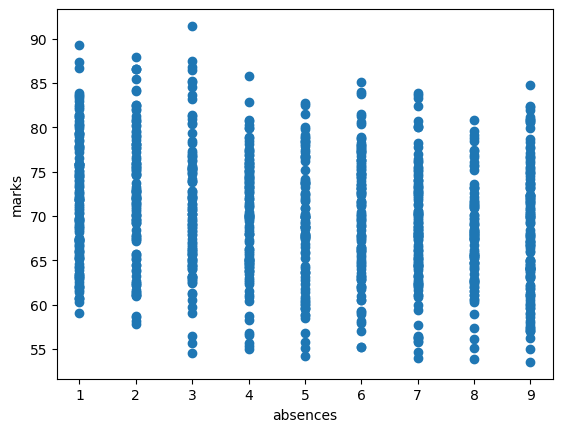

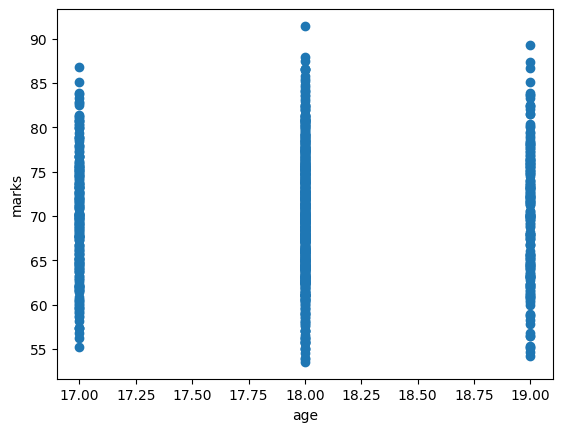

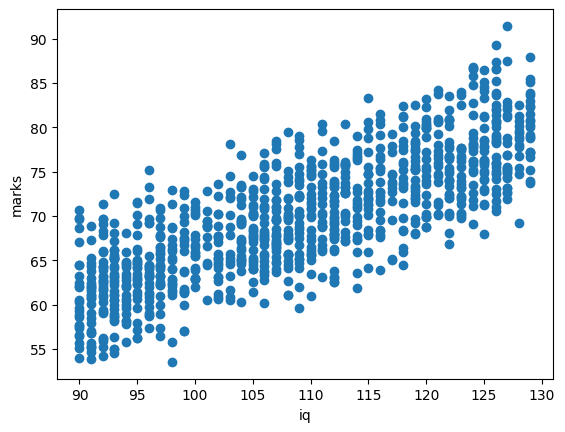

In [34]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('/content/Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features

x_features = ['internet','sex','traveltime','studytime', 'freetime', 'absences', 'age', 'iq']

for i in range(len(x_features)):
  plt.scatter(x_train[:,i],y_train)
  plt.xlabel(x_features[i])
  plt.ylabel('marks')
  plt.show()

# To get an idea whether to add some features or not
# Add some features if required in x_train

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
    x_train[:, 0] = np.where(x_train[:, 0] == 'yes', 1, np.where(x_train[:, 0] == 'no', 0, x_train[:, 0]))
    x_train[:, 1] = np.where(x_train[:, 1] == 'M', 1, np.where(x_train[:, 1] == 'F', 0, x_train[:, 1]))
    return x_train

x_train = feature_changing(x_train)

In [35]:
def z_score(x_train):

    # find the mean of each column/feature
    x_mean = np.mean(x_train)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    x_std = np.std(x_train)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    x_train = (x_train - x_mean) / x_std

    return x_train,x_std,x_mean

In [36]:
def cost(x_train,y_train,w,b):
    m = len(x_train)
    loss = np.mean((np.dot(x_train,w)+b-y_train)**2)
    return loss

In [37]:
def gradient_descent(x_train, y_train, w, b):
    learning_rate = 0.03
    num_iterations = 1000
    m = len(x_train)  # number of training examples

    for i in range(num_iterations):
        # Calculate predictions
        predictions = np.dot(x_train, w) + b

        # Calculate the error
        error = predictions - y_train

        # Calculate the gradients
        dw = np.dot(x_train.T, error)/m
        db = np.sum(error)/m

        # Update the weights and bias
        w = w - learning_rate * dw
        b = b - learning_rate * db

        # Print the cost every 100 iterations
        '''if i % 100 == 0:
            cost = (1/(2*m)) * np.sum(error ** 2)
            print(f"Iteration {i}: Cost {cost}")'''

    return w, b

In [38]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)


x_predict = pd.read_excel('/content/Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('/content/Test data.xlsx').iloc[:,8].to_numpy()
y_predict = np.dot(x_predict,w) + b
accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")



Congratulations, your accuracy is 100.0%
